#Build a system that shows relevant ads for search engines

Creating a system that shows relevant ads for search engines involves several components and steps. Here's an overview of how such a system can be designed:

### 1. **User Query Processing:**
   - **Natural Language Processing (NLP):** When a user enters a search query, the system uses NLP techniques to understand the context, intent, and keywords in the query.
   - **Keyword Extraction:** The system identifies key terms that will be used to match ads.

### 2. **Ad Matching Engine:**
   - **Ad Database:** A database stores all the available ads along with metadata such as keywords, target audience, geographical location, and bid amounts.
   - **Relevance Algorithm:** The system uses algorithms to match the extracted keywords from the user's query with the ad metadata. Factors such as keyword relevance, user intent, and historical data on ad performance can influence this matching process.
   - **Real-Time Bidding (RTB):** If multiple ads match the user's query, a bidding process can determine which ad to display. Advertisers can bid in real-time based on how much they're willing to pay for their ad to appear for that specific search query.

### 3. **User Profiling and Targeting:**
   - **User Data:** The system may use data on the user’s past search behavior, demographic information, location, and preferences to further refine ad targeting.
   - **Personalization:** Based on user profiles, the system personalizes ads to make them more relevant, increasing the likelihood of user engagement.

### 4. **Ad Display:**
   - **Ad Ranking:** Ads are ranked based on relevance and bidding price. The top-ranked ads are displayed on the search engine results page (SERP).
   - **Ad Format:** Different ad formats (text, image, video) can be used based on the ad type and user preferences.

### 5. **Performance Tracking:**
   - **Click-Through Rate (CTR):** The system tracks how often users click on ads and calculates the CTR for performance evaluation.
   - **Conversion Tracking:** If the ad leads to a specific action (e.g., purchase, sign-up), the system tracks these conversions to measure ad effectiveness.
   - **Feedback Loop:** Performance data is fed back into the system to continuously improve ad relevance and targeting.

### 6. **Machine Learning Optimization:**
   - **Learning Models:** Machine learning models can be employed to predict which ads are more likely to perform well based on historical data and real-time signals.
   - **A/B Testing:** The system can run A/B tests to compare different ad variations and optimize performance over time.

### 7. **Data Privacy and Compliance:**
   - **GDPR/CCPA Compliance:** Ensure that the system adheres to data protection laws like GDPR and CCPA, allowing users to opt-out of data collection and ad targeting if they wish.
   - **Transparency:** Provide transparency to users on how their data is used for ad targeting and give them control over their ad preferences.

### 8. **Infrastructure:**
   - **Scalability:** The system should be designed to handle high volumes of traffic and ad requests, especially during peak times.
   - **Cloud-Based Solutions:** Cloud platforms like Google Cloud, AWS, or Oracle Cloud can be used for hosting the infrastructure, ensuring reliability and scalability.

### Example Technologies:
- **NLP Libraries:** SpaCy, NLTK, or Transformer models for query understanding.
- **Databases:** NoSQL databases like MongoDB or distributed SQL like Google Spanner for ad storage.
- **ML Frameworks:** TensorFlow, PyTorch for building predictive models.
- **RTB Platforms:** OpenRTB for real-time bidding processes.

This is a high-level overview; each component can be further detailed based on specific requirements and scale.

##Import libraries

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

##Build a Real world dataset

In [15]:
import pandas as pd

# Example data
data = {
    "query": [
        "best smartphone battery", "fastest laptop", "smartphone camera quality",
        "phone battery life", "cheap headphones"
    ],
    "ad_text": [
        "Buy the latest smartphone with long-lasting battery!",
        "Top laptops with high performance and speed.",
        "Get a smartphone with the best camera quality.",
        "Find phones with the best battery life.",
        "Buy affordable headphones with great sound."
    ],
    "relevance": [1, 1, 1, 1, 0]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Save to CSV
df.to_csv('ad_relevance_data.csv', index=False)

In [28]:
import numpy as np

# Generate additional rows for the dataset
np.random.seed(42)  # For reproducibility

additional_queries = [
    "buy smartphones online", "best laptop for gaming", "affordable fitness tracker",
    "wireless charging pads", "cheap 4k tv", "bluetooth speakers", "noise cancelling earphones",
    "best desktop computer", "smart home devices", "camera deals",
    "fitness smartwatch", "budget smartphones", "latest gaming consoles",
    "wireless earbuds", "best camera phone", "high-end laptop",
    "best soundbar", "affordable tablets", "robot vacuum deals", "4k gaming monitor"
] * 50  # Repeat to get 1000 entries

additional_ads = [
    "Shop the best deals on smartphones.", "Find top gaming laptops at great prices.", "Get fit with affordable fitness trackers.",
    "Discover wireless charging pads for your devices.", "Buy cheap 4K TVs with amazing quality.", "Bluetooth speakers for every occasion.",
    "Experience top-quality noise cancelling earphones.", "Best desktop computers for work and play.", "Upgrade your home with smart devices.",
    "Get the best deals on cameras today.", "Stay fit with the latest smartwatches.", "Find budget smartphones that pack a punch.",
    "Get the latest gaming consoles at the best prices.", "Shop wireless earbuds for high-quality sound.", "Capture moments with the best camera phones.",
    "High-end laptops for all your needs.", "Enhance your TV experience with the best soundbars.", "Affordable tablets with great features.",
    "Clean effortlessly with robot vacuums.", "Experience gaming like never before with 4K monitors."
] * 50  # Repeat to match 1000 entries

additional_relevance = np.random.randint(0, 2, size=1000)  # Random relevance (0 or 1) for the new rows

# Create a DataFrame for the additional data
additional_data = {
    "query": additional_queries,
    "ad_text": additional_ads,
    "relevance": additional_relevance
}
additional_df = pd.DataFrame(additional_data)

# Append the new rows to the existing DataFrame
df = pd.concat([df, additional_df], ignore_index=True)

# Save the updated dataset with 1000 additional rows
csv_path_1000 = '/content/ad_relevance_data_1000_rows.csv'
df.to_csv(csv_path_1000, index=False)

# Display the first few rows of the updated dataset
print(df.head())

                       query  \
0    best smartphone battery   
1             fastest laptop   
2  smartphone camera quality   
3         phone battery life   
4           cheap headphones   

                                             ad_text  relevance  
0  Buy the latest smartphone with long-lasting ba...          1  
1       Top laptops with high performance and speed.          1  
2     Get a smartphone with the best camera quality.          1  
3            Find phones with the best battery life.          1  
4        Buy affordable headphones with great sound.          0  


##Create tokenizer and neural network model

In [19]:
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_csv('/content/ad_relevance_data_1000_rows.csv')

# Display the first few rows of the dataset
print(df.head())

# Separate data into inputs and labels
queries = df['query'].values
ads = df['ad_text'].values
labels = df['relevance'].values

# Tokenize and pad sequences
tokenizer = Tokenizer(num_words=10000)  # Adjust vocabulary size based on dataset size
tokenizer.fit_on_texts(queries + ads)

query_sequences = tokenizer.texts_to_sequences(queries)
ad_sequences = tokenizer.texts_to_sequences(ads)

# Determine the maximum sequence length
max_len = max([len(seq) for seq in query_sequences + ad_sequences])

# Pad sequences to the same length
query_padded = pad_sequences(query_sequences, maxlen=max_len, padding='post')
ad_padded = pad_sequences(ad_sequences, maxlen=max_len, padding='post')

# Split data into training and test sets
query_train, query_test, ad_train, ad_test, y_train, y_test = train_test_split(
    query_padded, ad_padded, labels, test_size=0.2, random_state=42)

                       query  \
0    best smartphone battery   
1             fastest laptop   
2  smartphone camera quality   
3         phone battery life   
4           cheap headphones   

                                             ad_text  relevance  
0  Buy the latest smartphone with long-lasting ba...          1  
1       Top laptops with high performance and speed.          1  
2     Get a smartphone with the best camera quality.          1  
3            Find phones with the best battery life.          1  
4        Buy affordable headphones with great sound.          0  


In [20]:
df.shape

(1005, 3)

##Build a neural network model

In [21]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, Dropout, Concatenate

# Define input layers
query_input = Input(shape=(max_len,))
ad_input = Input(shape=(max_len,))

# Embedding layers
embedding_dim = 128  # Increase embedding dimension for better representation
query_embedding = Embedding(input_dim=10000, output_dim=embedding_dim, input_length=max_len)(query_input)
ad_embedding = Embedding(input_dim=10000, output_dim=embedding_dim, input_length=max_len)(ad_input)

# LSTM layers to process sequences
query_lstm = LSTM(128)(query_embedding)
ad_lstm = LSTM(128)(ad_embedding)

# Concatenate the LSTM outputs
merged = Concatenate()([query_lstm, ad_lstm])

# Add fully connected layers
dense = Dense(64, activation='relu')(merged)
dropout = Dropout(0.5)(dense)
output = Dense(1, activation='sigmoid')(dropout)

# Define the model
model = Model(inputs=[query_input, ad_input], outputs=output)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3             │ (None, 8)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_4             │ (None, 8)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_4 (Embedding)   │ (None, 8, 128)         │      1,280,000 │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_5 (Embedding)   │ (None, 8, 128)         │      1,280,000 │ input_layer_4[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_4 (LSTM)             │ (None, 128)            │        131,584 │ embedding_4[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_5 (LSTM)             │ (None, 128)            │        131,584 │ embedding_5[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_1             │ (None, 256)            │              0 │ lstm_4[0][0],          │
│ (Concatenate)             │                        │                │ lstm_5[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_6 (Dense)           │ (None, 64)             │         16,448 │ concatenate_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_3 (Dropout)       │ (None, 64)             │              0 │ dense_6[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_7 (Dense)           │ (None, 1)              │             65 │ dropout_3[0][0]        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 2,839,681 (10.83 MB)

 Trainable params: 2,839,681 (10.83 MB)

 Non-trainable params: 0 (0.00 B)

##Train the model

In [24]:
# Train the model
model.fit([query_train, ad_train], y_train, validation_data=([query_test, ad_test], y_test), epochs=30, batch_size=32)

Epoch 1/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - accuracy: 0.5364 - loss: 0.6850 - val_accuracy: 0.4876 - val_loss: 0.7128
Epoch 2/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.5749 - loss: 0.6776 - val_accuracy: 0.4876 - val_loss: 0.7006
Epoch 3/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.5918 - loss: 0.6778 - val_accuracy: 0.4776 - val_loss: 0.7036
Epoch 4/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - accuracy: 0.5850 - loss: 0.6794 - val_accuracy: 0.4876 - val_loss: 0.7069
Epoch 5/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - accuracy: 0.5832 - loss: 0.6730 - val_accuracy: 0.4876 - val_loss: 0.7005
Epoch 6/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 0.5908 - loss: 0.6807 - val_accuracy: 0.4478 - val_loss: 0.7031
Epoch 7/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - accuracy: 0.5093 - loss: 0.6882 - val_accuracy: 0.4527 - val_loss: 0.6996
Epoch 8/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.5606 - loss: 0.6818 - val_accuracy: 0.4876 - v

##Test the model

In [25]:
# Evaluate the model
loss, accuracy = model.evaluate([query_test, ad_test], y_test)
print(f"Test Accuracy: {accuracy:.4f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4717 - loss: 0.7117 
Test Accuracy: 0.4726


In [27]:
# Example of predicting relevance for a new query and ad
new_query = "best budget phone for photography"
new_ad = "Capture stunning photos with our affordable smartphone!"

# Preprocess the new query and ad
new_query_seq = tokenizer.texts_to_sequences([new_query])
new_ad_seq = tokenizer.texts_to_sequences([new_ad])

new_query_padded = pad_sequences(new_query_seq, maxlen=max_len, padding='post')
new_ad_padded = pad_sequences(new_ad_seq, maxlen=max_len, padding='post')

# Predict relevance
prediction = model.predict([new_query_padded, new_ad_padded])
print(f"Relevance score: {prediction[0][0]:.4f}")

# You can set a threshold to determine if the ad is relevant or not
threshold = 0.5
if prediction[0][0] >= threshold:
  print("Ad is relevant to the query.")
else:
  print("Ad is not relevant to the query.")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Relevance score: 0.6353
Ad is relevant to the query.


##Performance tracking

 ### Key Metrics

* Accuracy: The percentage of correctly classified samples. While useful, accuracy alone may not be sufficient, especially if the dataset is imbalanced.
* Precision: The ratio of correctly predicted relevant ads to the total number of ads predicted as relevant. Precision is crucial when false positives (irrelevant ads shown as relevant) are costly.
* Recall (Sensitivity): The ratio of correctly predicted relevant ads to the total number of actual relevant ads. Recall is important when missing a relevant ad (false negative) is more problematic.
* F1 Score: The harmonic mean of precision and recall, providing a balanced measure when dealing with imbalanced data.
* AUC-ROC: The Area Under the Receiver Operating Characteristic curve, which evaluates how well the model distinguishes between classes (relevant and irrelevant ads).
* Click-Through Rate (CTR): For real-world systems, tracking how often users click on ads (CTR) can provide practical insights into model effectiveness.

Epoch 1/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step - accuracy: 0.6012 - loss: 0.6734 - val_accuracy: 0.4876 - val_loss: 0.7101
Epoch 2/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 0.5783 - loss: 0.6715 - val_accuracy: 0.4627 - val_loss: 0.7143
Epoch 3/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - accuracy: 0.5794 - loss: 0.6701 - val_accuracy: 0.4627 - val_loss: 0.7131
Epoch 4/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - accuracy: 0.5500 - loss: 0.6811 - val_accuracy: 0.4826 - val_loss: 0.7091
Epoch 5/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 0.5599 - loss: 0.6811 - val_accuracy: 0.4527 - val_loss: 0.7148
Epoch 6/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.5723 - loss: 0.6741 - val_accuracy: 0.4826 - val_loss: 0.7199
Epoch 7/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.5616 - loss: 0.6809 - val_accuracy: 0.4826 - val_loss: 0.7134
Epoch 8/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.5683 - loss: 0.6759 - val_accuracy: 0.4527 - 

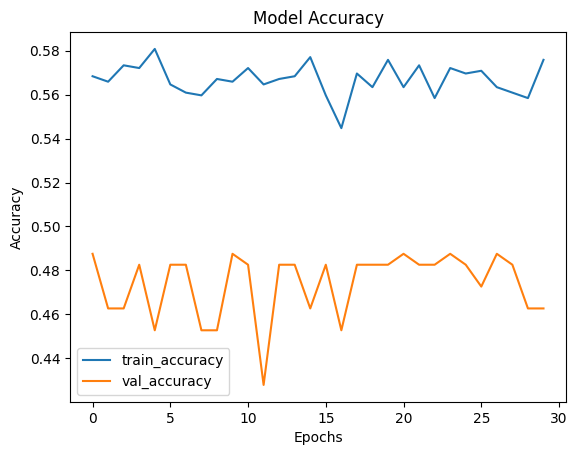

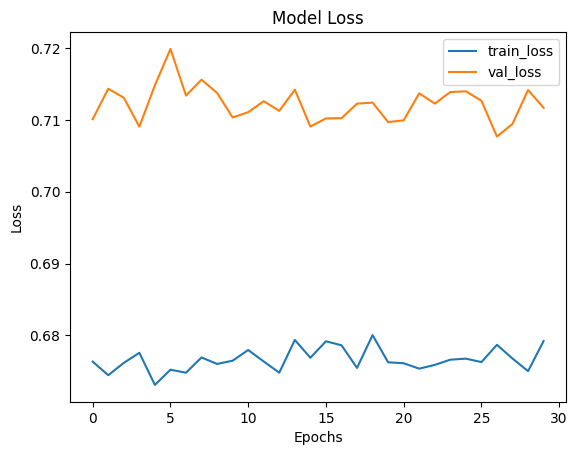

In [30]:
history = model.fit([query_train, ad_train], y_train, validation_data=([query_test, ad_test], y_test), epochs=30, batch_size=64)

# Plot accuracy and loss over epochs
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Confusion matrix

In [31]:
from sklearn.metrics import confusion_matrix, classification_report

# Predict on the test set
y_pred = (model.predict([query_test, ad_test]) > 0.5).astype(int)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step
Confusion Matrix:
 [[33 62]
 [46 60]]
Classification Report:
               precision    recall  f1-score   support

           0       0.42      0.35      0.38        95
           1       0.49      0.57      0.53       106

    accuracy                           0.46       201
   macro avg       0.45      0.46      0.45       201
weighted avg       0.46      0.46      0.46       201



#ROC AUC curve

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


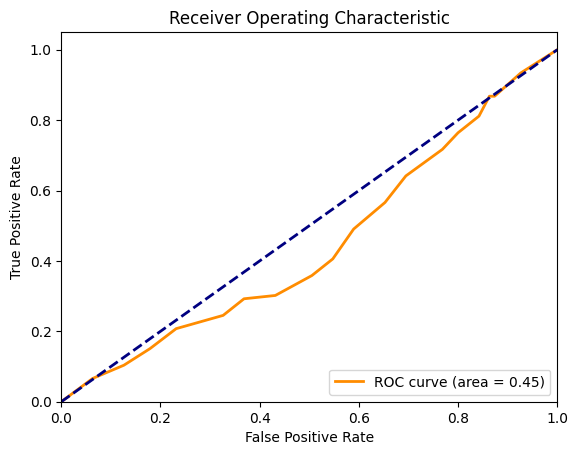

In [32]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, model.predict([query_test, ad_test]))
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()